In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
data = pd.read_csv("data/immoweb_cleaned.csv")
data = data.set_index("id")
data.head(10)

,locality,type_of_property,subtype_of_property,price,nr_of_rooms,area,equiped_kitchen,furnished,open_fire,terrace,...,garden_area,total_land_area,nr_of_facades,swimming_pool,building_condition,kitchen,region,province,sq_m_price,sq_m_land_price
id,,,,,,,,,,,,,,,,,,,,,
9044081,1083,1,1,265000,4,90,1,0,0,1,...,0,103,4,0,1,0,0,1,2944.44,2572.82
9043978,1000,1,1,1795000,4,650,2,0,1,1,...,0,1050,3,0,1,0,0,1,2761.54,1709.52
9044188,1050,2,2,3800000,5,752,3,0,0,1,...,-1,340,2,0,2,0,0,1,5053.19,11176.47
9041095,4860,2,3,320000,5,231,4,0,0,1,...,1200,1421,3,0,1,1,2,9,1385.28,225.19
9043036,9600,1,1,195000,2,75,1,0,0,0,...,0,74,2,0,3,0,1,5,2600.00,2635.14
9042950,6010,1,4,235000,3,149,3,0,0,1,...,0,164,2,0,1,0,2,8,1577.18,1432.93
9042073,1070,1,1,320000,3,130,2,0,0,1,...,0,144,2,0,1,0,0,1,2461.54,2222.22
9042267,7181,2,5,325000,2,130,1,0,0,1,...,600,1043,4,0,4,0,2,8,2500.00,311.60
9042511,5340,2,5,569000,6,324,1,0,0,1,...,1821,2202,4,0,2,0,2,11,1756.17,258.40


In [3]:
data.shape

(9054, 22)

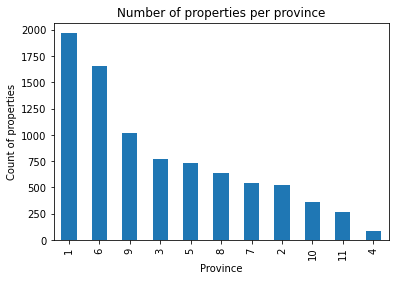

In [143]:
rep_province = data["province"].value_counts()
rep_province.plot(kind='bar')
plt.title("Number of properties per province")
plt.xlabel("Province")
plt.ylabel("Count of properties")
plt.show()

In [88]:
Wallonia = data.loc[data['region'] == 2]
Flandern = data.loc[data['region'] == 1]
Brussels = data.loc[data['region'] == 0]
Wallonia.head(10)

,locality,type_of_property,subtype_of_property,price,nr_of_rooms,area,equiped_kitchen,furnished,open_fire,terrace,...,garden_area,total_land_area,nr_of_facades,swimming_pool,building_condition,kitchen,region,province,sq_m_price,sq_m_land_price
id,,,,,,,,,,,,,,,,,,,,,
9041095,4860,2,3,320000,5,231,4,0,0,1,...,1200,1421,3,0,1,1,2,9,1385.28,225.19
9042950,6010,1,4,235000,3,149,3,0,0,1,...,0,164,2,0,1,0,2,8,1577.18,1432.93
9042267,7181,2,5,325000,2,130,1,0,0,1,...,600,1043,4,0,4,0,2,8,2500.00,311.60
9042511,5340,2,5,569000,6,324,1,0,0,1,...,1821,2202,4,0,2,0,2,11,1756.17,258.40
8949028,4870,2,7,349000,5,350,3,0,1,1,...,450,700,3,0,3,0,2,9,997.14,498.57
9039245,1330,2,3,585000,5,187,5,0,0,1,...,222,483,3,0,3,0,2,7,3128.34,1211.18
9038896,4430,1,1,210000,2,77,1,0,0,1,...,0,82,-1,0,1,0,2,9,2727.27,2560.98
9038897,4430,1,1,250000,2,97,1,0,0,1,...,0,102,3,0,1,0,2,9,2577.32,2450.98
9042223,4120,2,3,325000,3,130,2,0,0,1,...,760,1031,4,0,3,0,2,9,2500.00,315.23


## Belgium

In [89]:
corrMatrix = data.corr()

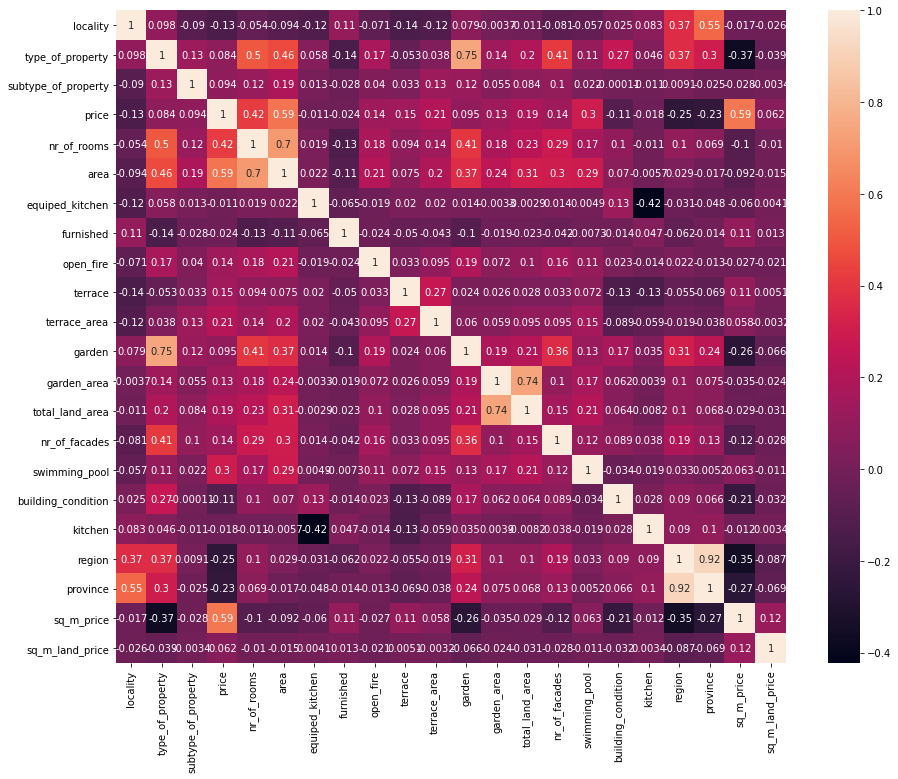

In [90]:
fig_dims = (15, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix, annot=True, ax = ax)
plt.show()

Text(0, 0.5, 'Price')

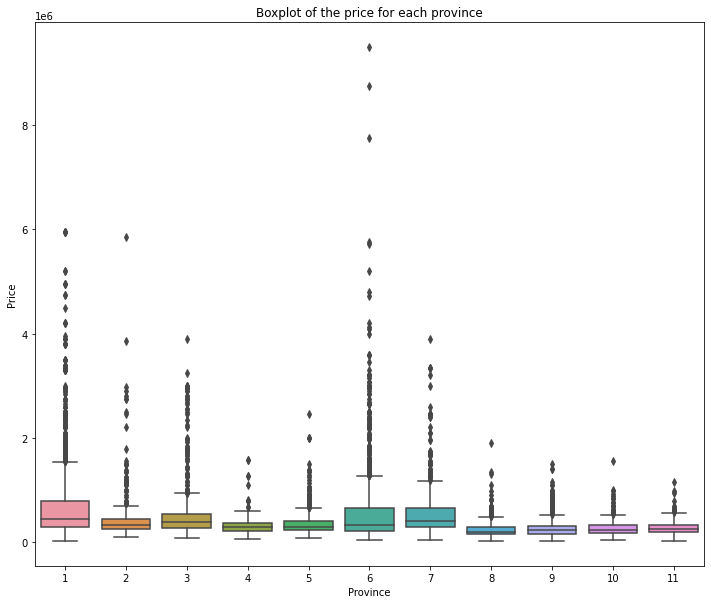

In [91]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='price', 
               data=data,
               ax = ax) 
plt.title("Boxplot of the price for each province")
plt.xlabel("Province")
plt.ylabel("Price")
               


In [145]:
data.groupby('locality')['price'].mean().idxmax()
#9772 is Wannegem-Lede

9772

In [93]:
data.groupby('locality')['price'].mean().idxmin()
#6567 is Fontaine-Haute

6567

In [146]:
data.groupby('locality')['sq_m_land_price'].mean().idxmax()
#3071 is Kortenberg

3071

In [147]:
data.groupby('locality')['sq_m_land_price'].mean().idxmin()
#4342 is Awans

4342

### Only houses

In [94]:
Houses = data.loc[data['type_of_property'] == 2]

In [95]:
corrMatrix_house = Houses.corr()

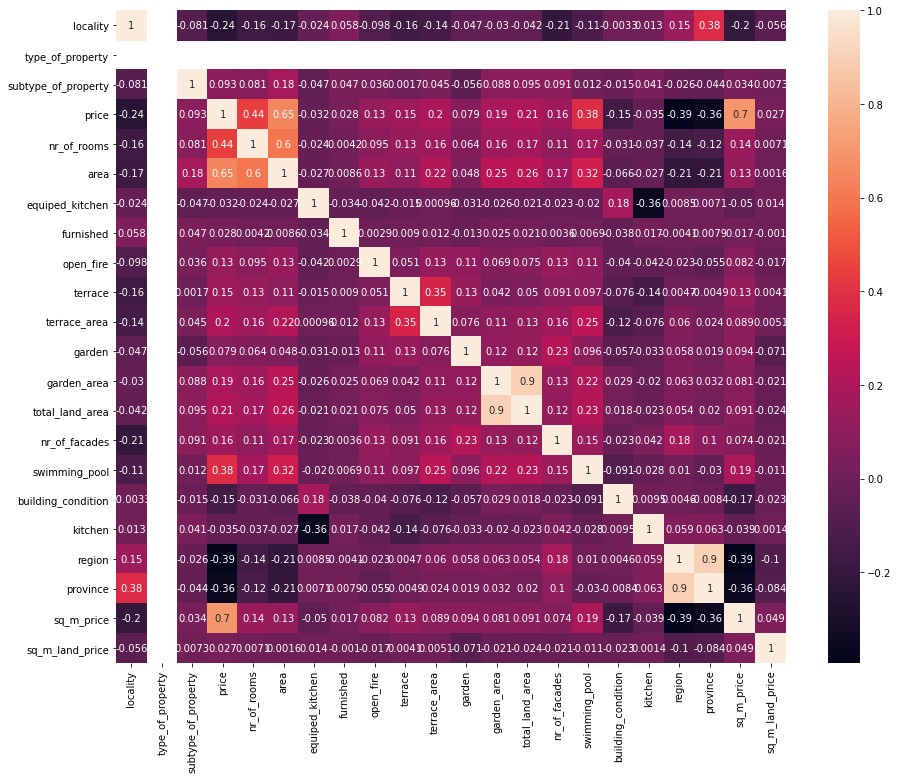

In [96]:
fig_dims = (15, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix_house, annot=True, ax = ax)
plt.show()

Text(0, 0.5, 'Price')

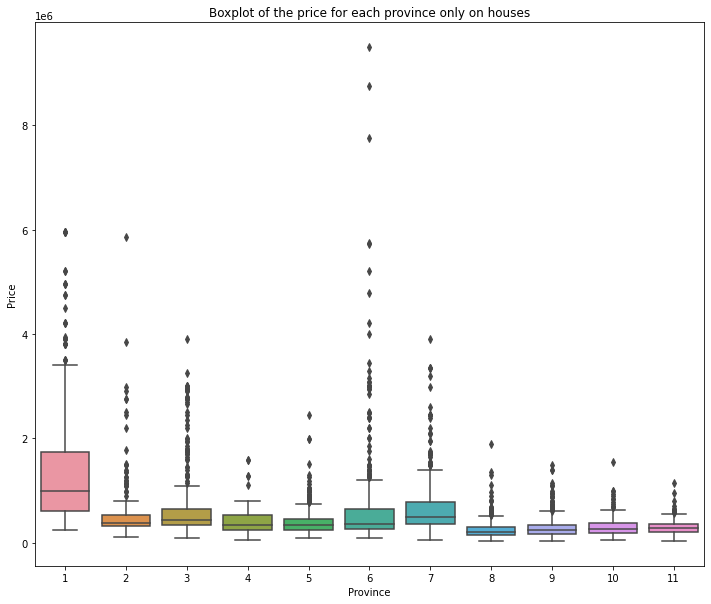

In [97]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='price', 
               data=Houses,
               ax = ax) 
plt.title("Boxplot of the price for each province only on houses")
plt.xlabel("Province")
plt.ylabel("Price")
               

### Flats

In [98]:
Flat = data.loc[data['type_of_property'] == 1]

In [99]:
corrMatrix_flat = Flat.corr()

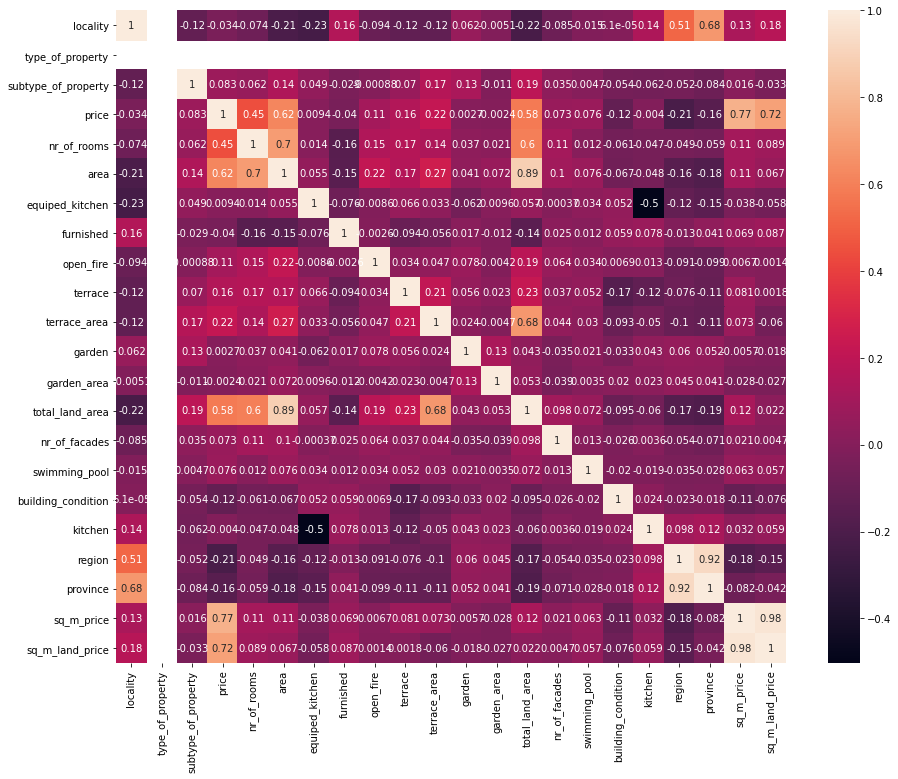

In [100]:
fig_dims = (15, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix_flat, annot=True, ax = ax)
plt.show()

Text(0, 0.5, 'Price')

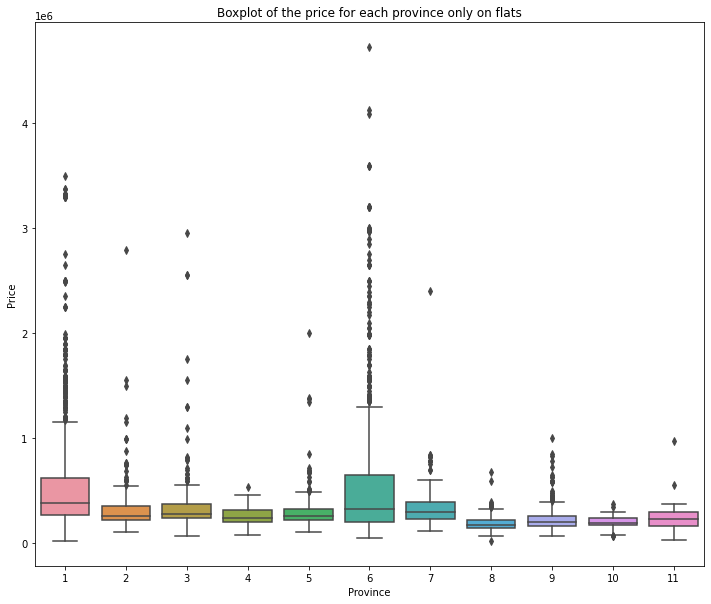

In [101]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='price', 
               data=Flat,
               ax = ax) 
plt.title("Boxplot of the price for each province only on flats")
plt.xlabel("Province")
plt.ylabel("Price")

## Wallonia

In [102]:
corrMatrix_wall = Wallonia.corr()

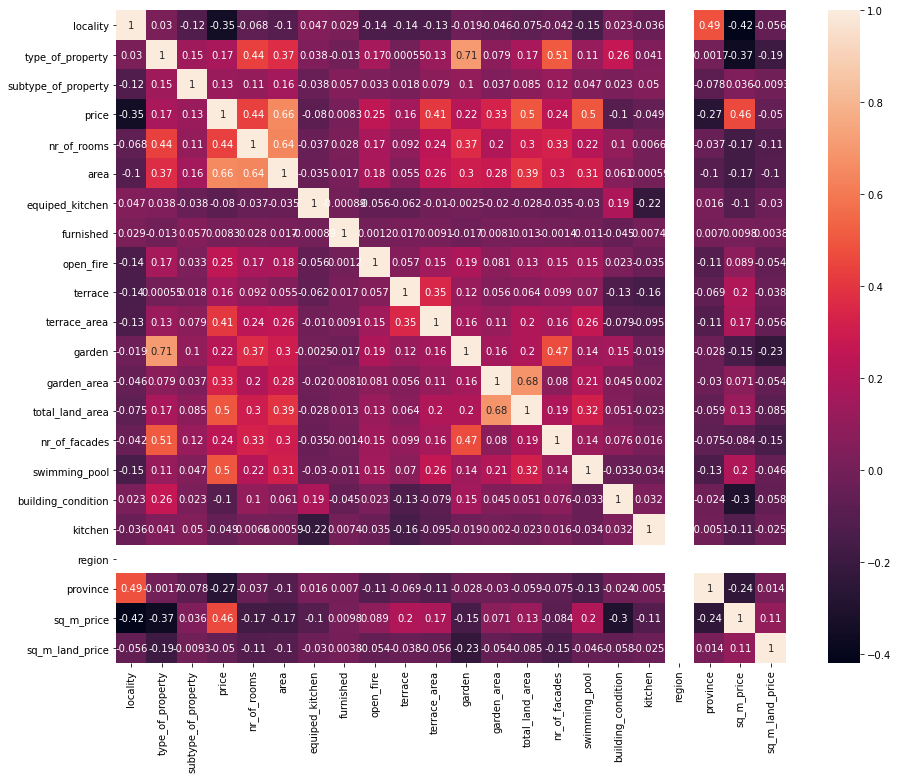

In [103]:
fig_dims = (15, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix_wall, annot=True, ax = ax)
plt.show()

In [104]:
Wallonia.groupby('locality')['price'].mean().idxmax()
#7133 is Buvrinnes

7133

In [105]:
Wallonia.groupby('locality')['price'].mean().idxmin()
#6567 is Fontaine-Haute 

6567

In [148]:
Wallonia.groupby('locality')['sq_m_land_price'].mean().idxmax()
#5070 is Vitrival

5070

In [149]:
Wallonia.groupby('locality')['sq_m_land_price'].mean().idxmin()
#Awans

4342

### Only houses

In [106]:
Houses_wall = Wallonia.loc[data['type_of_property'] == 2]

In [107]:
corrMatrix_house_wall = Houses_wall.corr()

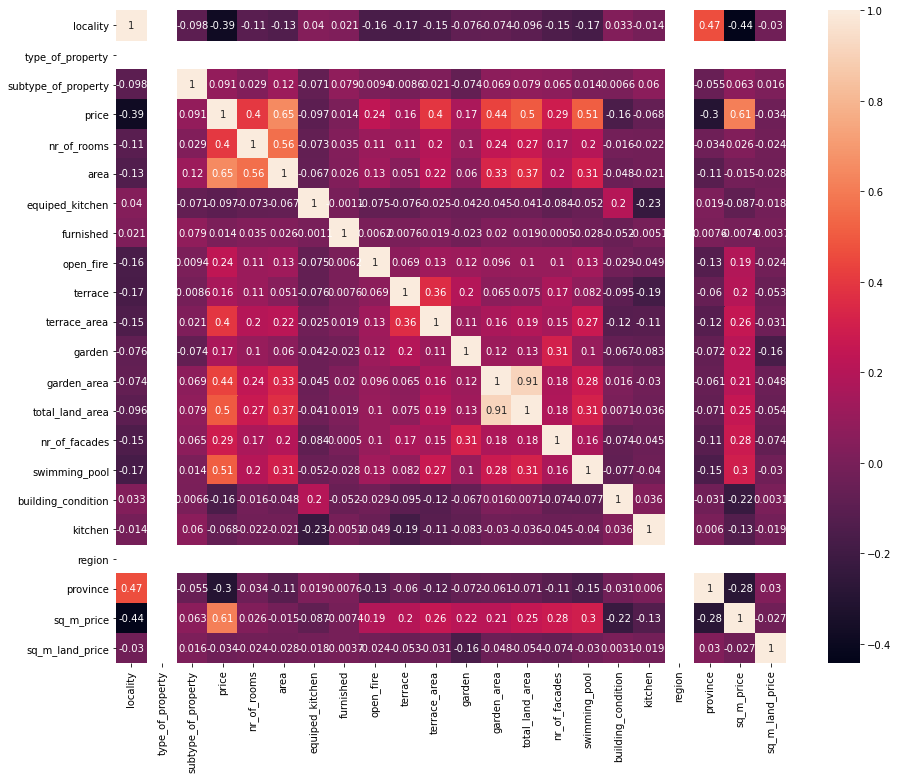

In [108]:
fig_dims = (15, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix_house_wall, annot=True, ax = ax)
plt.show()

Text(0, 0.5, 'Price')

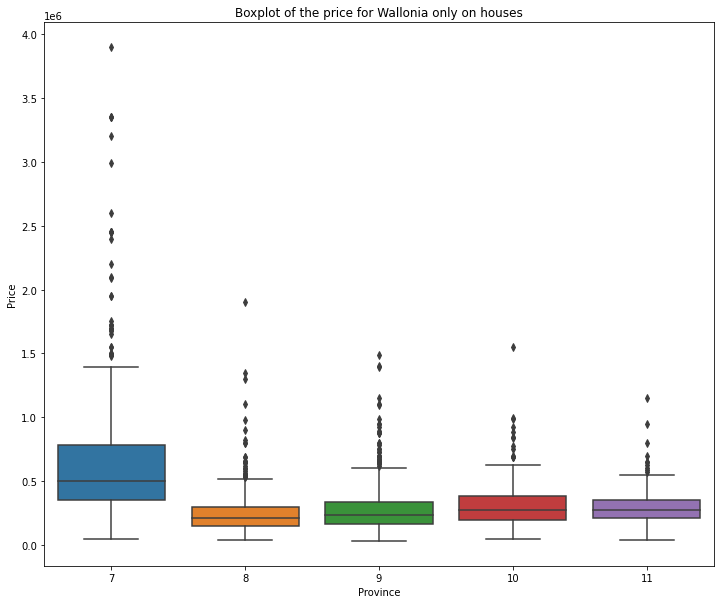

In [109]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='price', 
               data=Houses_wall,
               ax = ax) 
plt.title("Boxplot of the price for Wallonia only on houses")
plt.xlabel("Province")
plt.ylabel("Price")
               

### Only Flats

In [110]:
Flat_wall = Wallonia.loc[data['type_of_property'] == 1]

In [111]:
corrMatrix_flat_wall = Flat_wall.corr()

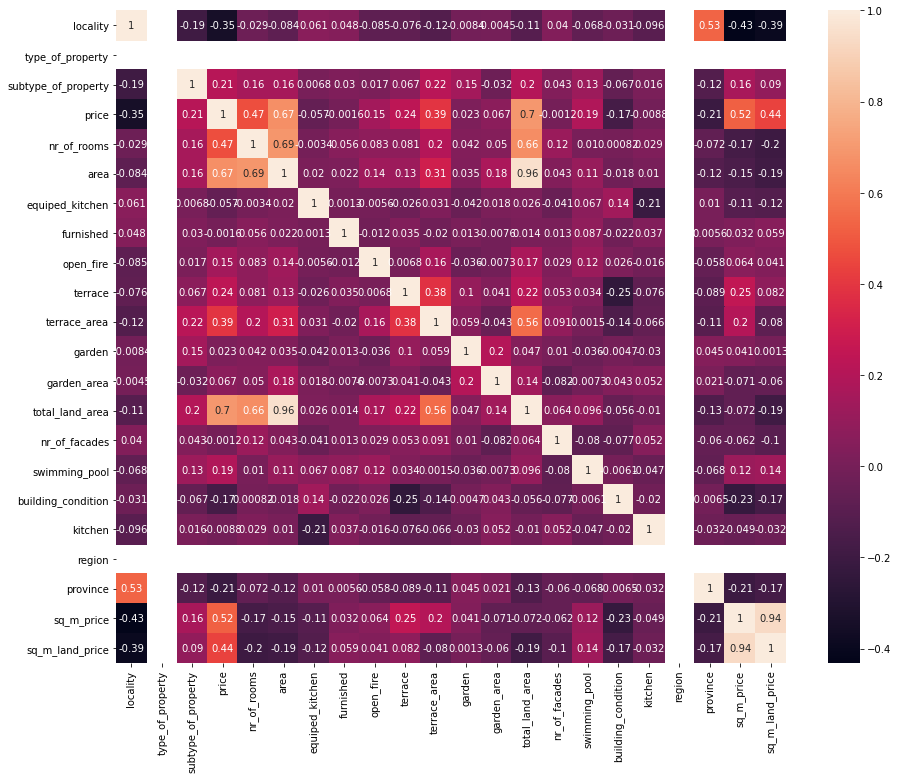

In [112]:
fig_dims = (15, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix_flat_wall, annot=True, ax = ax)
plt.show()

Text(0, 0.5, 'Price')

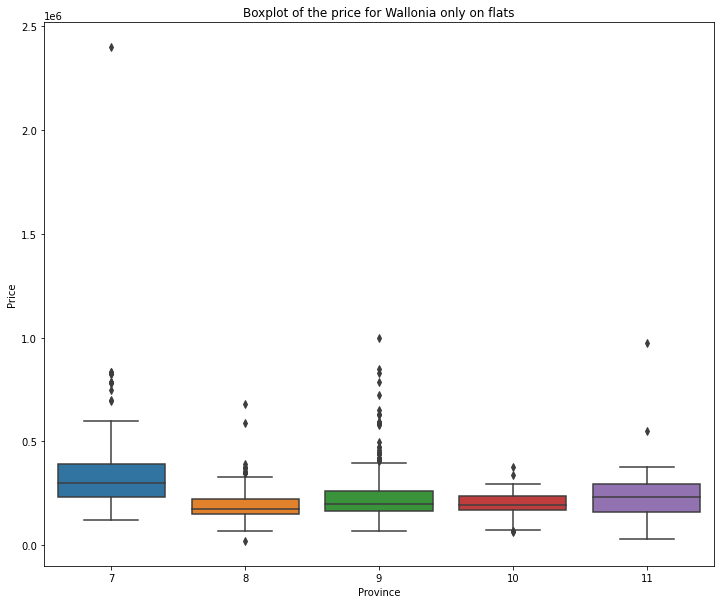

In [113]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='price', 
               data=Flat_wall,
               ax = ax) 
plt.title("Boxplot of the price for Wallonia only on flats")
plt.xlabel("Province")
plt.ylabel("Price")
               

## Flandern

In [114]:
corrMatrix_vla = Flandern.corr()

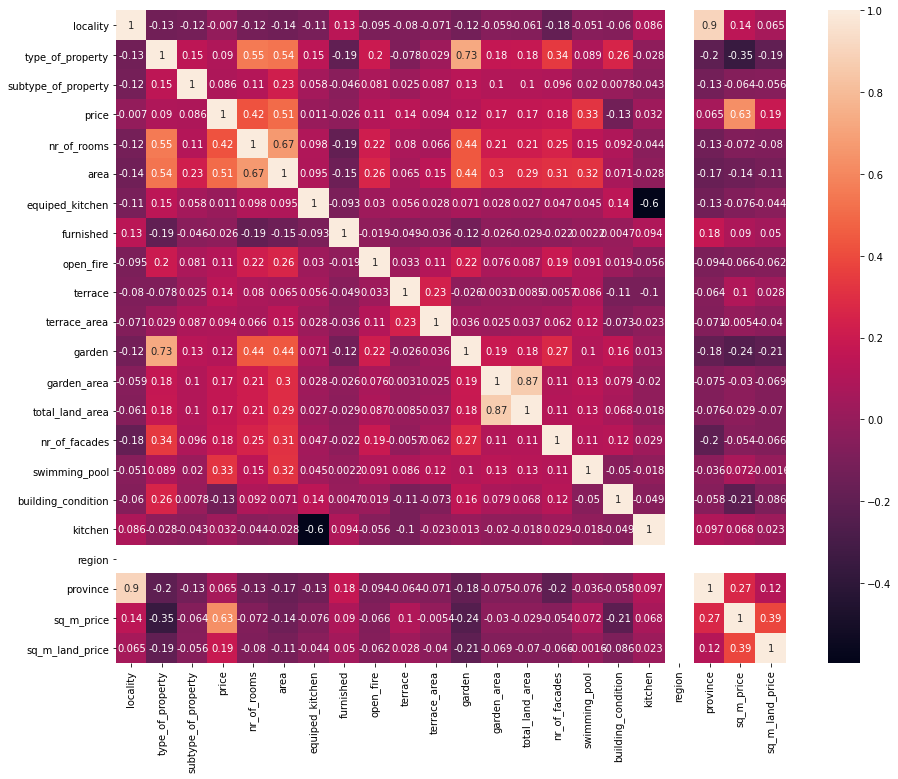

In [115]:
fig_dims = (15, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix_vla, annot=True, ax = ax)
plt.show()

In [116]:
Flandern.groupby('locality')['price'].mean().idxmax()
#9772 is Wannegem-Lede

9772

In [117]:
Flandern.groupby('locality')['price'].mean().idxmin() 
#8902 is Voormezele

8902

In [150]:
Flandern.groupby('locality')['sq_m_land_price'].mean().idxmax()
#3071 is Kortenberg

3071

In [151]:
Flandern.groupby('locality')['sq_m_land_price'].mean().idxmin()
#3570 is Alken

3570

### Only Houses

In [118]:
Houses_vla = Flandern.loc[data['type_of_property'] == 2]

In [119]:
corrMatrix_house_vla = Houses_vla.corr()

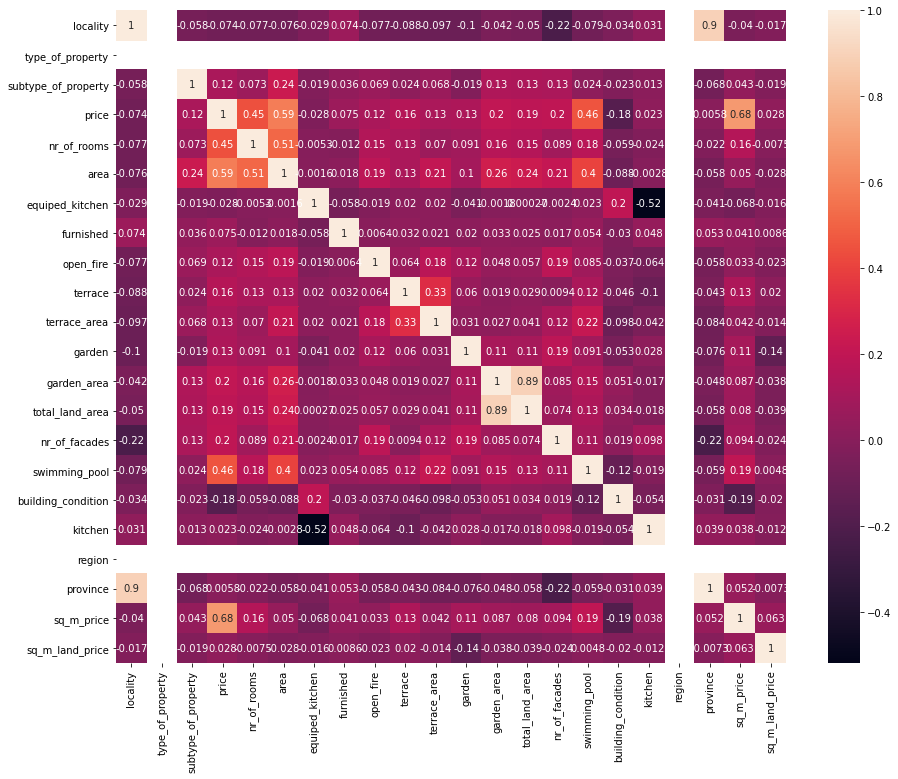

In [120]:
fig_dims = (15, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix_house_vla, annot=True, ax = ax)
plt.show()

Text(0, 0.5, 'Price')

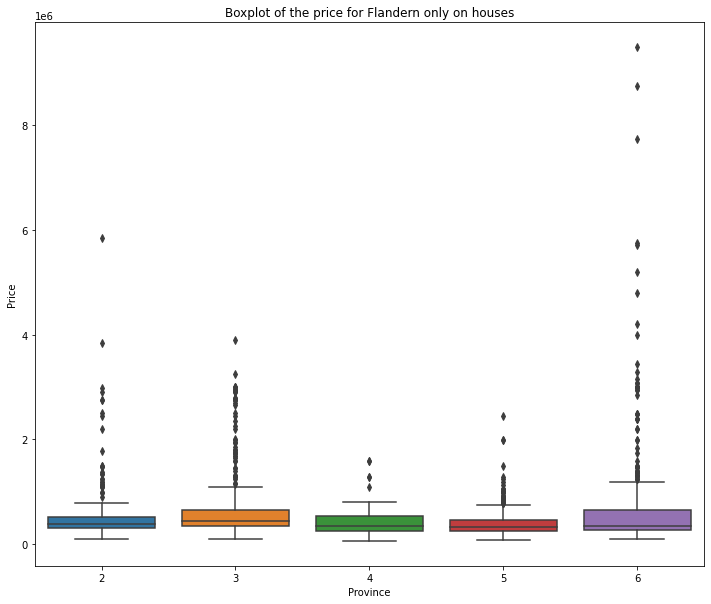

In [121]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='price', 
               data=Houses_vla,
               ax = ax) 
plt.title("Boxplot of the price for Flandern only on houses")
plt.xlabel("Province")
plt.ylabel("Price")

### Only Flats

In [122]:
Flat_vla = Flandern.loc[data['type_of_property'] == 1]

In [123]:
corrMatrix_flat_vla = Flat_vla.corr()

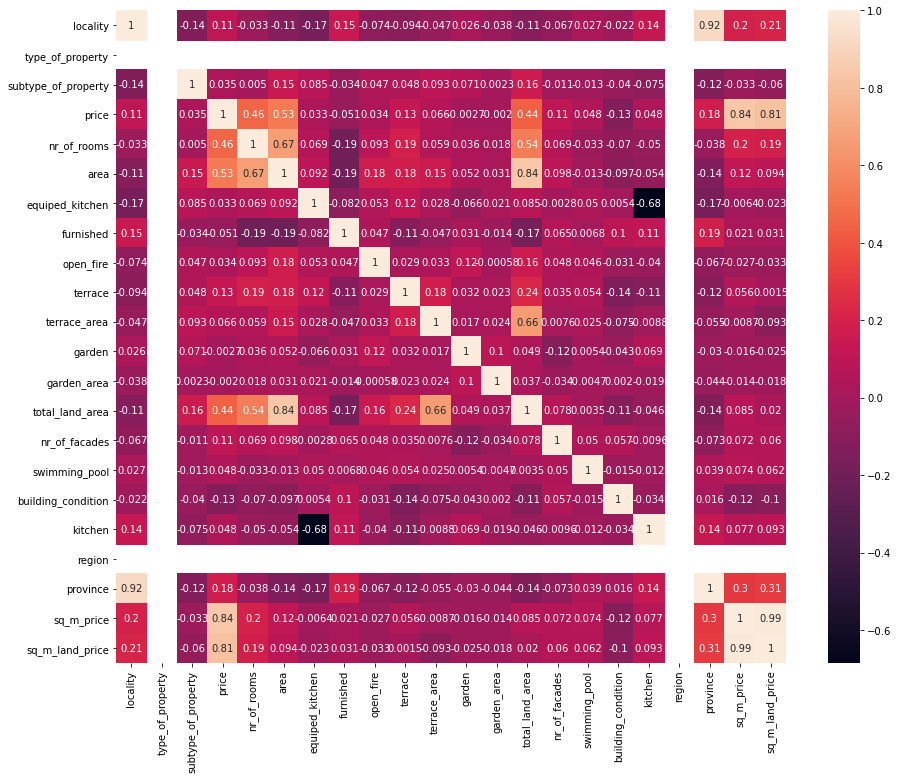

In [124]:
fig_dims = (15, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix_flat_vla, annot=True, ax = ax)
plt.show()

Text(0, 0.5, 'Price')

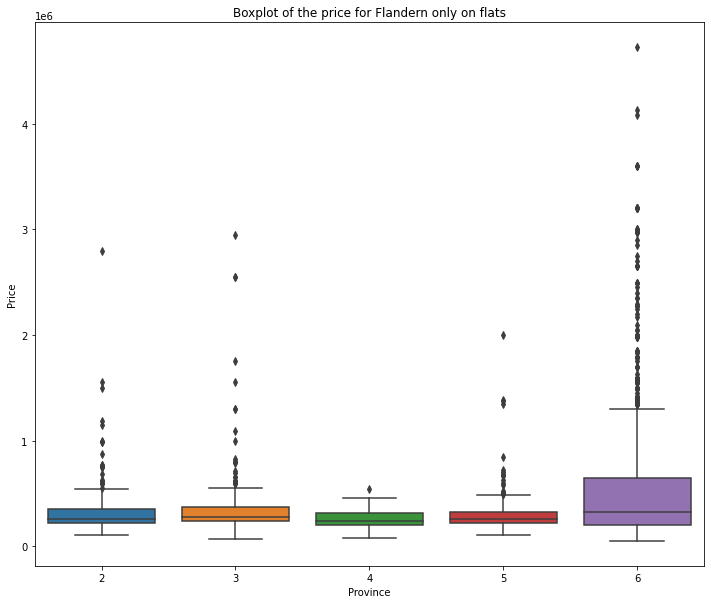

In [125]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='price', 
               data=Flat_vla,
               ax = ax) 
plt.title("Boxplot of the price for Flandern only on flats")
plt.xlabel("Province")
plt.ylabel("Price")

## Brussels 

In [126]:
corrMatrix_bru = Brussels.corr()

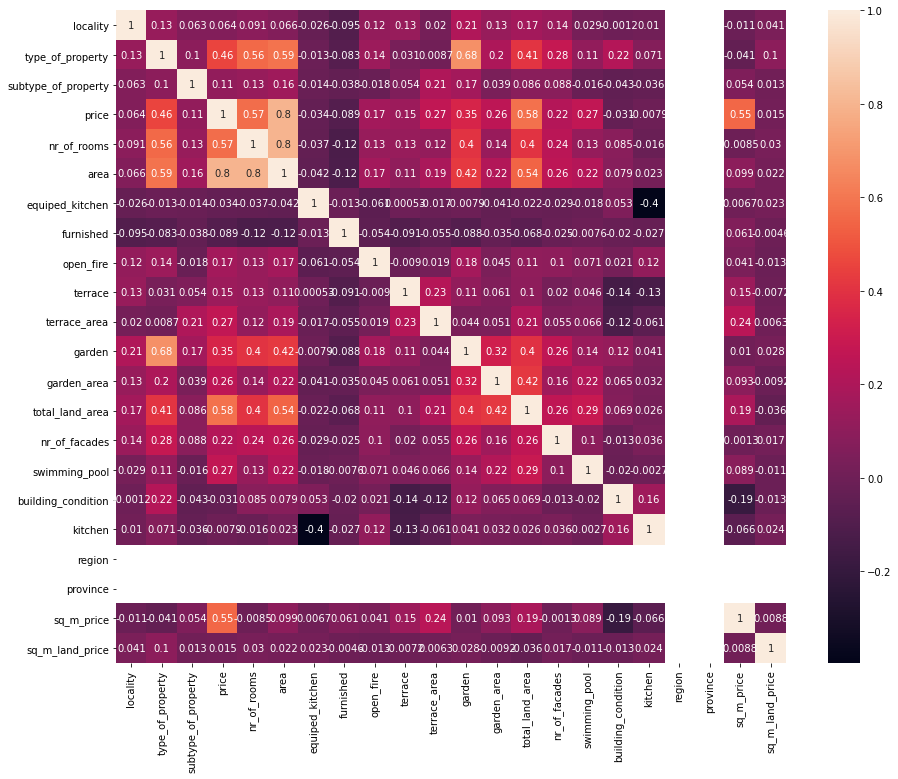

In [127]:
fig_dims = (15, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix_bru, annot=True, ax = ax)
plt.show()

In [128]:
Brussels.groupby('locality')['price'].mean().idxmax()
# 1150 is Woluwe-Saint-Pierre

1150

In [129]:
Brussels.groupby('locality')['price'].mean().idxmin()
#1081 is Koekelberg

1081

In [152]:
Brussels.groupby('locality')['sq_m_land_price'].mean().idxmax()
#1200 is Woluwe-Saint-Lambert

1200

In [153]:
Brussels.groupby('locality')['sq_m_land_price'].mean().idxmin()
#1090 is Jette

1090

### Only Houses

In [131]:
Houses_bxl = Brussels.loc[data['type_of_property'] == 2]

In [132]:
corrMatrix_house_bxl = Houses_bxl.corr()

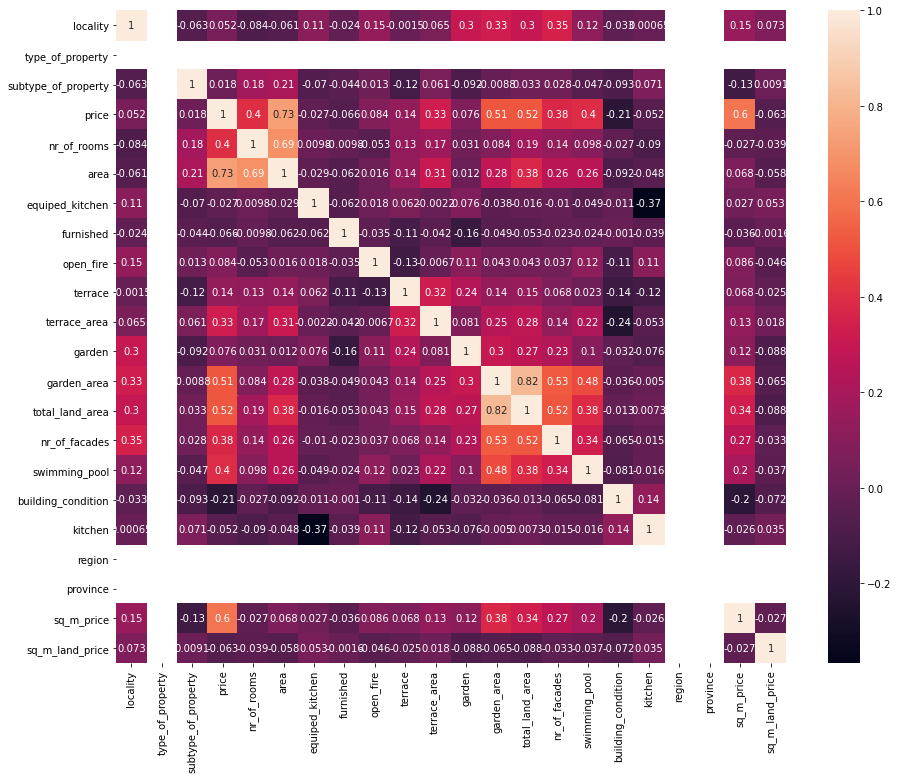

In [133]:
fig_dims = (15, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix_house_bxl, annot=True, ax = ax)
plt.show()

Text(0, 0.5, 'Price')

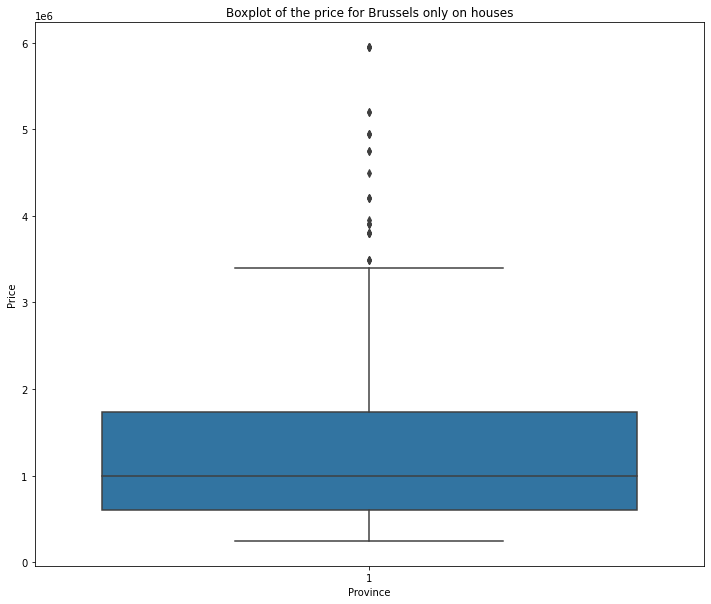

In [134]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='price', 
               data=Houses_bxl,
               ax = ax) 
plt.title("Boxplot of the price for Brussels only on houses")
plt.xlabel("Province")
plt.ylabel("Price")

### Only Flats

In [135]:
Flat_bxl = Brussels.loc[data['type_of_property'] == 1]

In [136]:
corrMatrix_flat_bxl = Flat_bxl.corr()

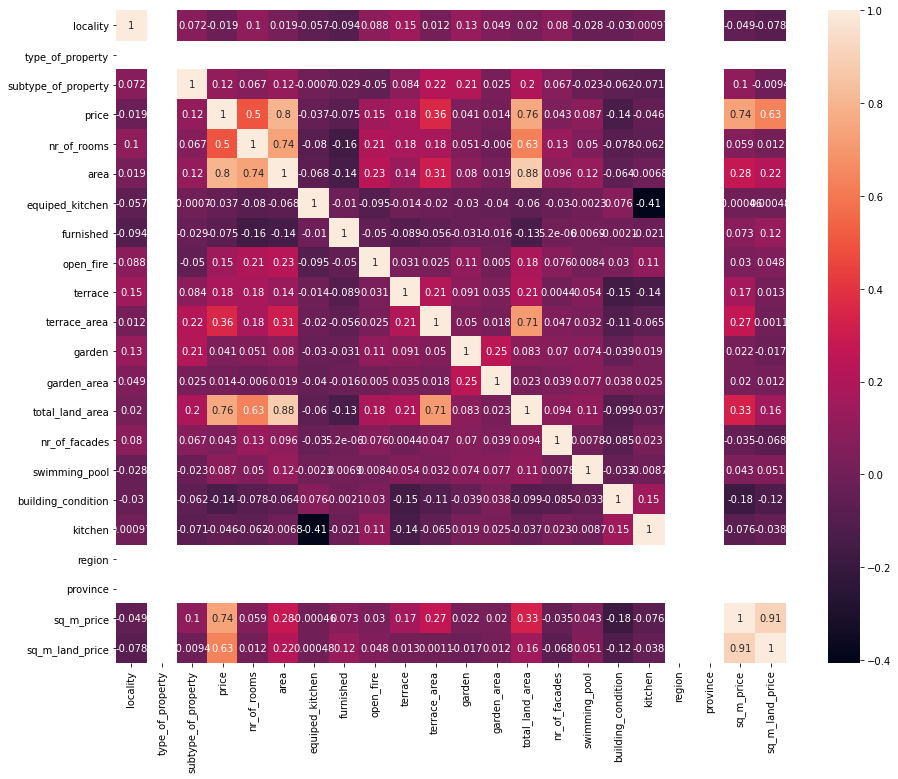

In [137]:
fig_dims = (15, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix_flat_bxl, annot=True, ax = ax)
plt.show()

Text(0, 0.5, 'Price')

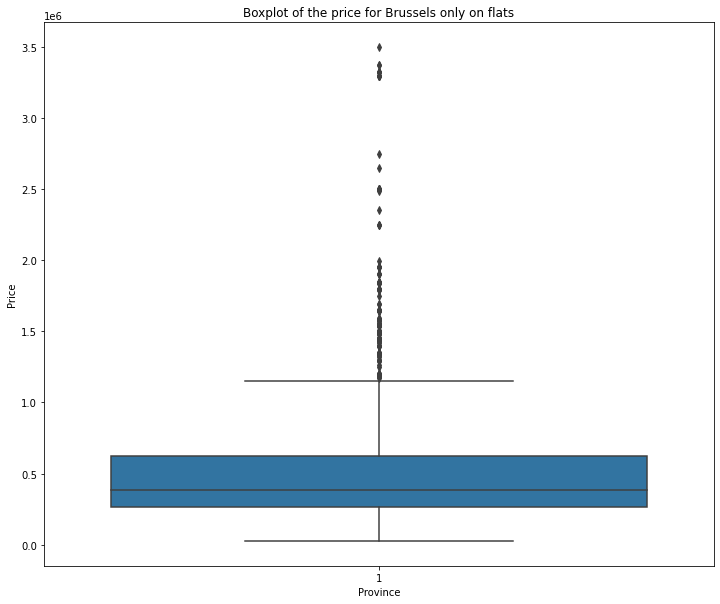

In [138]:
# Boxplot of the price for each province
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='province',
               y='price', 
               data=Flat_bxl,
               ax = ax) 
plt.title("Boxplot of the price for Brussels only on flats")
plt.xlabel("Province")
plt.ylabel("Price")